In [1]:
# Importing librairies
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = pd.DataFrame(dataset['train'])

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


In [10]:
# This code is the one of the 6th file: 6_exercice_job_demand. We are about to use the pivot_table dataframe to do
# a merging with another dataframe

df_ex = df[df['job_country'] == 'United States'].copy()

df_ex['job_posted_month'] = df['job_posted_date'].dt.strftime('%B') # for the months

pivot_table = df_ex.pivot_table(
    index='job_posted_month',                # Index basé sur les mois
    columns='job_title_short',    # Colonnes basées sur les jobs
    aggfunc='size'              # Fonction d'agrégation : médiane 
)

In [11]:
pivot_table.reset_index(inplace=True)
pivot_table['month_number'] = pd.to_datetime(pivot_table['job_posted_month'], format='%B').dt.month
pivot_table.sort_values(by='month_number', inplace=True)
pivot_table.set_index('job_posted_month',inplace=True)
pivot_table.drop(columns='month_number')
pivot_table

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_number
job_posted_month,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,1
February,447,24,6124,3060,4956,56,1258,878,1127,90,2
March,438,19,6218,3183,4779,59,1114,829,1150,115,3
April,565,40,6049,2801,4867,51,1025,781,991,112,4
May,279,20,4993,2976,4377,49,839,746,914,90,5
June,446,32,5683,2893,4645,48,1009,812,1033,93,6
July,581,39,5201,2570,4876,65,883,747,1095,153,7
August,903,39,6634,3269,6318,68,1186,903,1515,194,8
September,897,50,4639,3224,4568,113,805,775,1014,228,9


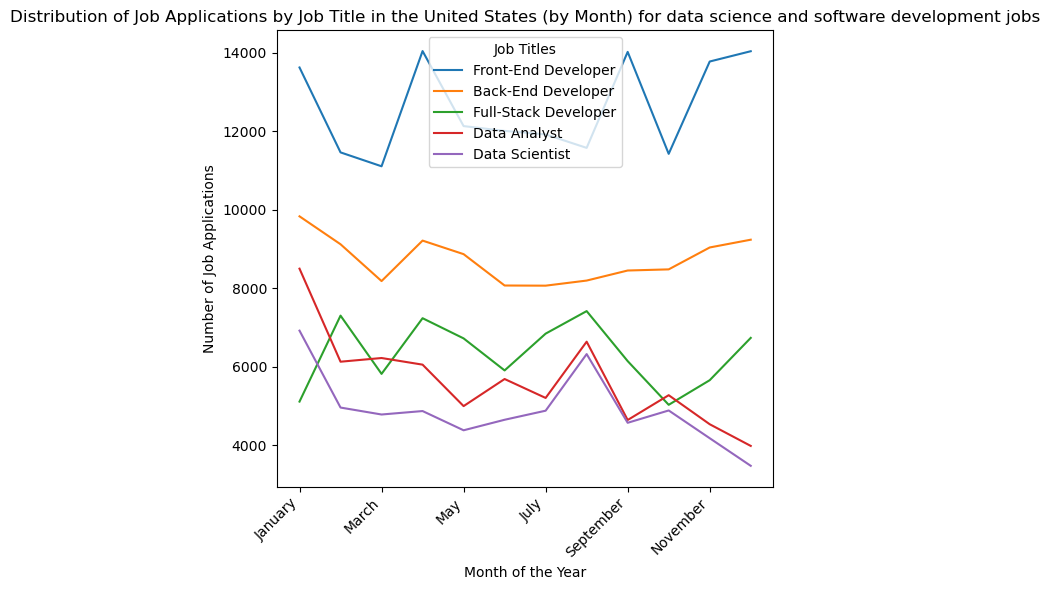

In [3]:
# Importing a dataframe from the concerned adress
df_US_software_pivot=pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

# Merging datas
merged = pivot_table.merge(df_US_software_pivot, on='job_posted_month')

# Retrieving the top 5 jobbs
top_5 = merged.sum().sort_values(ascending= False).head().index

# Plotting
plotter= merged.loc[:,top_5]
plotter.plot(kind='line',figsize=(6, 6))
plt.title('Distribution of Job Applications by Job Title in the United States (by Month) for data science and software development jobs')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Job Applications')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Titles')
plt.tight_layout()
plt.show()

In [4]:
pivot_table

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_number
job_posted_month,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,1
February,447,24,6124,3060,4956,56,1258,878,1127,90,2
March,438,19,6218,3183,4779,59,1114,829,1150,115,3
April,565,40,6049,2801,4867,51,1025,781,991,112,4
May,279,20,4993,2976,4377,49,839,746,914,90,5
June,446,32,5683,2893,4645,48,1009,812,1033,93,6
July,581,39,5201,2570,4876,65,883,747,1095,153,7
August,903,39,6634,3269,6318,68,1186,903,1515,194,8
September,897,50,4639,3224,4568,113,805,775,1014,228,9
